In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV

In [2]:
def confusion_matrix_rep(y_test,y_pred,class_names,model):
    print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))
    print("precision:",metrics.precision_score(y_test, y_pred,average='macro'))
    cm=confusion_matrix(y_test, y_pred, labels=class_names)
    print("confusion matrix:\n\n" ,cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    plt.title('Confusion matrix for '+model+" model", y=-0.5)
    fmt = 'd'

    # write the number of predictions in each bucket
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

    # if background is dark, use a white number, and vice-versa
        plt.text(j, i, format(cm[i, j], fmt),
         horizontalalignment="center",
         color="white" if cm[i, j] > thresh else "black")
    fig.colorbar(cax)
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)
    ax.tick_params(axis='x', rotation=90)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [3]:
poverty_withsq = pd.read_csv(r"preprocessed.csv")
poverty_wosq = pd.read_csv(r"preprocessed_wosq.csv")

#mapping poverty levels with the actual content
di = {1: "extreme poverty", 2: "moderate poverty",3:"vulnerable households",4:"non vulnerable households"}
poverty_withsq['Target']=poverty_withsq['Target'].map(di)
poverty_wosq['Target']=poverty_wosq['Target'].map(di)
a=poverty_withsq

# getting the labels
class_names=poverty_withsq.Target.unique()
class_names=list(class_names)

In [4]:
#poverty_wosq['Target']

In [5]:
col1=list(poverty_withsq.columns)
col2=list(poverty_wosq.columns)

In [6]:
#finding columns with object as datatypes and removing them for classification
data_notnum = list(a.select_dtypes(exclude=[np.number]).columns)

print("columns to be ignored as training attributes: ",data_notnum)

columns to be ignored as training attributes:  ['Id', 'idhogar', 'Target']


In [7]:
print("Number of columns before excluding:")
print(len(col2))
print(len(col1))
col1=list(filter(lambda a: a not in data_notnum , col1))
col2=list(filter(lambda a: a not in data_notnum , col2))
print("Number of columns after excluding non numeric columns:")
print(len(col2))
print(len(col1))

Number of columns before excluding:
132
140
Number of columns after excluding non numeric columns:
129
137


In [8]:
X_sq = poverty_withsq[col1] # features for dataset which includes squared parameters
y_sq = poverty_withsq.Target #target

X_nsq = poverty_wosq[col2] #features for dataset which does not includes squared parameters
y_nsq = poverty_wosq.Target # target

In [9]:
# splitting dataset(with squared values) to train and test, taking proportion as 60 40 for now, as an initial checkpoint
X_train_sq, X_test_sq, y_train_sq, y_test_sq = train_test_split(X_sq, y_sq, test_size=0.4, random_state=1)
# splitting dataset(without squared values)
X_train_nsq, X_test_nsq, y_train_nsq, y_test_nsq = train_test_split(X_nsq, y_nsq, test_size=0.4, random_state=1)

#len(y_test_sq)+len(y_train_sq)

F1: 0.3704224401287741
precision: 0.4833049032972295
confusion matrix:

 [[2280   78   11   11]
 [ 384  203   28   28]
 [ 375   73   20   11]
 [ 172   93   10   46]]


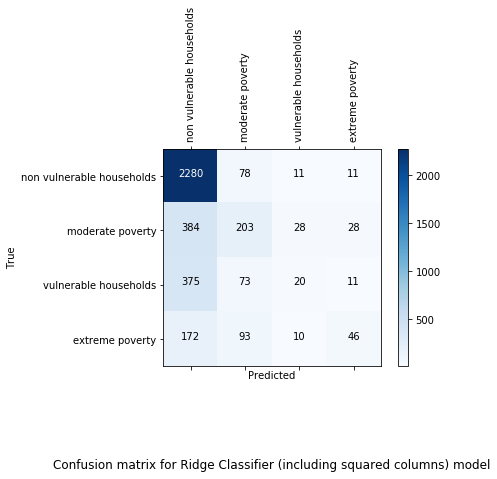

In [10]:
#Ridge classifier for dataset with squared columns
clf_sq_Ridge = RidgeClassifier()
clf_sq_Ridge = clf_sq_Ridge.fit(X_train_sq,y_train_sq)
y_pred_sq_Ridge = clf_sq_Ridge.predict(X_test_sq)
confusion_matrix_rep(y_test_sq,y_pred_sq_Ridge,class_names,"Ridge Classifier (including squared columns)")

F1: 0.3710361667696737
precision: 0.5069636777009808
confusion matrix:

 [[2280   81    9   10]
 [ 396  204   27   16]
 [ 369   74   25   11]
 [ 180   87   13   41]]


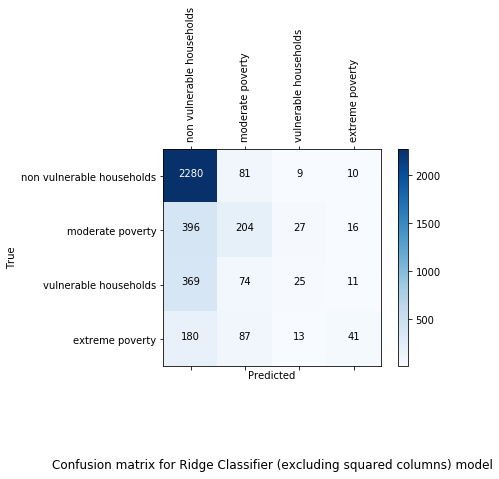

In [11]:
#Ridge classifier for dataset without squared columns
clf_nsq_Ridge = RidgeClassifier()
clf_nsq_Ridge = clf_nsq_Ridge.fit(X_train_nsq,y_train_nsq)
y_pred_nsq_Ridge = clf_nsq_Ridge.predict(X_test_nsq)
confusion_matrix_rep(y_test_nsq,y_pred_nsq_Ridge,class_names,"Ridge Classifier (excluding squared columns)")

In [12]:
print("Observations: As we can see, the precision score and F1 score for this model are pretty low, for both datasets, hence the square columns dont contribute too much to the training")

Observations: As we can see, the precision score and F1 score for this model are pretty low, for both datasets, hence the square columns dont contribute too much to the training


F1: 0.8534844242742501
precision: 0.8565340817093153
confusion matrix:

 [[2245   51   54   30]
 [  64  539   20   20]
 [  59   18  390   12]
 [  37    8   17  259]]


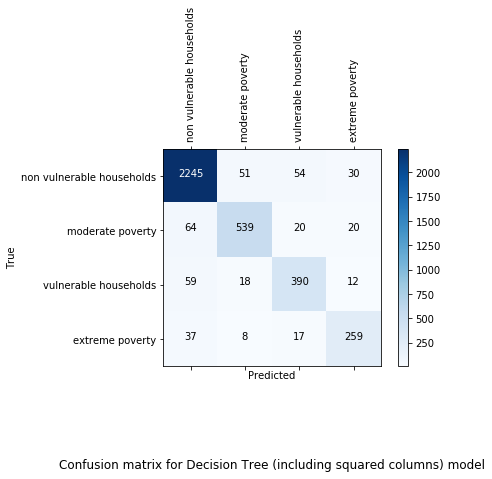

In [13]:
clf_sq_DT = DecisionTreeClassifier()
clf_sq_DT = clf_sq_DT.fit(X_train_sq,y_train_sq)
y_pred_sq_DT = clf_sq_DT.predict(X_test_sq)
confusion_matrix_rep(y_test_sq,y_pred_sq_DT,class_names,"Decision Tree (including squared columns)")

F1: 0.8636984994663155
precision: 0.8662479177871989
confusion matrix:

 [[2245   53   57   25]
 [  60  541   26   16]
 [  59   14  399    7]
 [  32    7   16  266]]


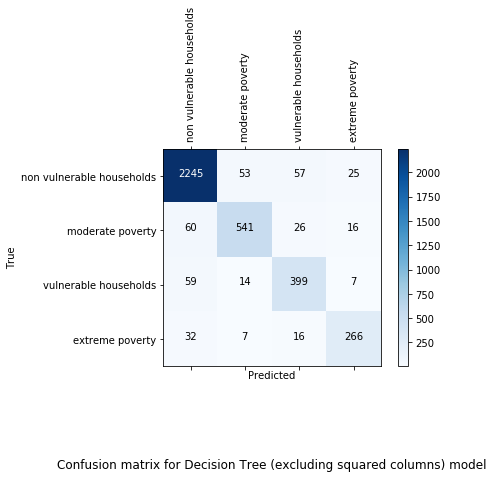

In [14]:
clf_nsq_DT = DecisionTreeClassifier()
clf_nsq_DT = clf_nsq_DT.fit(X_train_nsq,y_train_nsq)
y_pred_nsq_DT = clf_nsq_DT.predict(X_test_nsq)
confusion_matrix_rep(y_test_nsq,y_pred_nsq_DT,class_names,"Decision Tree (excluding squared columns)")

In [15]:
print("Observations: We observe that the F1 score and precision score are very high implying that the model is a good fit, but as we analyze the confusion matrix we observe that the highest contribution to the correct predicitions is from the 'non vulnerable' class.\nFor the other classes we observe that model still needs to be worked on. In order to correct this, we need to go back to the dataset and observe the Target variable. We see that the number of entries classified as 4 are much more than the other classes. This can be corrected by either downsampling the entries in this class, or upsampling those in the other classes.\n Another point to be noted is that splitting a model to 60-40 or any other proportion may not provide the model with adequate data to be trained on.")

Observations: We observe that the F1 score and precision score are very high implying that the model is a good fit, but as we analyze the confusion matrix we observe that the highest contribution to the correct predicitions is from the 'non vulnerable' class.
For the other classes we observe that model still needs to be worked on. In order to correct this, we need to go back to the dataset and observe the Target variable. We see that the number of entries classified as 4 are much more than the other classes. This can be corrected by either downsampling the entries in this class, or upsampling those in the other classes.
 Another point to be noted is that splitting a model to 60-40 or any other proportion may not provide the model with adequate data to be trained on.
